In [5]:
import numpy as np
import matplotlib.pyplot as mp

In [6]:
class Autoencoder:
    def __init__(self, input_dim, hidden_dim, lr=0.01):
        self.w1 = np.random.normal(
            0.0, pow(hidden_dim, -0.5), (input_dim, hidden_dim))
        self.w2 = np.random.normal(
            0.0, pow(hidden_dim, -0.5), (hidden_dim, input_dim))
        self.h = np.zeros((1, hidden_dim))
        self.lr = lr
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.theta = 0

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def feedforward(self, x):
        self.h = self.sigmoid(np.dot(x, self.w1) - self.theta)
        return self.sigmoid(np.dot(self.h, self.w2)-self.theta)

    def feedforward_upto_hidden(self, x):
        return self.sigmoid(np.dot(x, self.w1) - self.theta)

    def bprop_w2(self, g, y):  # target, output
        q = (-2)*(g-y)*y*(1-y)
        return np.dot(self.h.reshape(self.hidden_dim, 1), q.reshape(1, self.input_dim))

    def bprop_w1(self, g, y, x):  # target, output, input
        q1 = (-2)*(g-y)*y*(1-y)
        q2 = np.dot(self.w2, q1)
        return np.dot(x.reshape(self.input_dim, 1), q2*self.h*(1-self.h).reshape(1, self.hidden_dim))

    def training(self, input, target):
        x = np.array(input).T
        y = self.feedforward(x)
        g = np.array(target).T

        self.w1 = self.w1 - self.lr*self.bprop_w1(x, y, x)
        self.w2 = self.w2 - self.lr*self.bprop_w2(x, y)

In [7]:
input_dim = 784
hidden_dim = 100
epoch = 1

In [8]:
ae = Autoencoder(784, 100, lr=0.1)
training_dataset_file = open("mnist_200.csv", 'r')
training_dataset_list = training_dataset_file.readlines()
training_dataset_file.close()
input_list = list()
for k in range(epoch):
    ae.lr = ae.lr * 0.8  # learning lrate decay
    for i in training_dataset_list:
        all_values = i.split(',')
        inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
        input_list.append(inputs)
        ae.training(inputs, inputs)

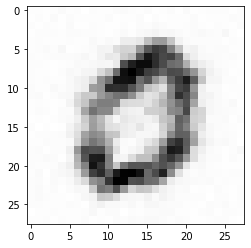

In [9]:
# True image (dimension = 784)
im_array = np.asfarray(input_list[1]).reshape((28, 28))

mp.imshow(im_array, cmap='Greys', interpolation='None')
output = ae.feedforward(input_list[1])
im_array = np.asfarray(output).reshape((28, 28))
mp.imshow(im_array, cmap='Greys', interpolation='None')

In [10]:
test_dataset_file = open("mnist_20+6.csv", 'r')
test_dataset_list = test_dataset_file.readlines()
test_dataset_file.close()
test_inputs_list = list()
for i in test_dataset_list:
    all_values = i.split(',')
    test_inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
    test_inputs_list.append(test_inputs)

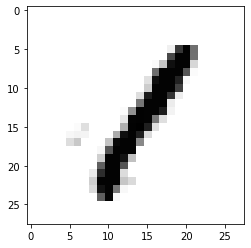

In [11]:
im_array = np.asfarray(test_inputs_list[1]).reshape((28,28))
mp.imshow(im_array, cmap='Greys', interpolation='None')

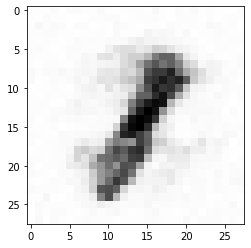

In [12]:
output = ae.feedforward(test_inputs_list[1])
im_array = np.asfarray(output).reshape((28,28))
mp.imshow(im_array, cmap='Greys', interpolation='None')

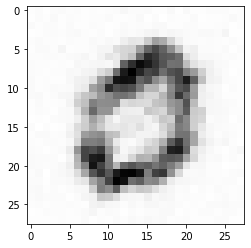

In [14]:
im_array = np.asfarray(test_inputs_list[20]).reshape((28,28))
mp.imshow(im_array, cmap='Greys', interpolation='None')
output = ae.feedforward(test_inputs_list[20])
im_array = np.asfarray(output).reshape((28,28))
mp.imshow(im_array, cmap='Greys', interpolation='None')

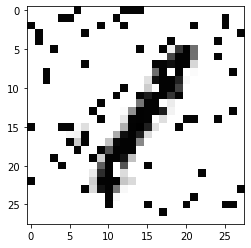

In [17]:
im_array = np.asfarray(test_inputs_list[21]).reshape((28,28))
mp.imshow(im_array, cmap='Greys', interpolation='None')


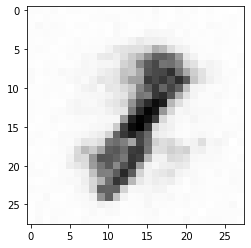

In [18]:
output = ae.feedforward(test_inputs_list[21])
im_array = np.asfarray(output).reshape((28,28))
mp.imshow(im_array, cmap='Greys', interpolation='None')

1/3 없음

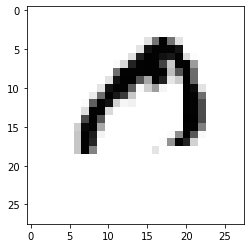

In [19]:
im_array = np.asfarray(test_inputs_list[22]).reshape((28,28))
mp.imshow(im_array, cmap='Greys', interpolation='None')

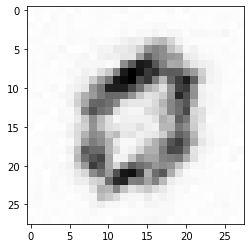

In [21]:
output = ae.feedforward(test_inputs_list[22])
im_array = np.asfarray(output).reshape((28,28))
mp.imshow(im_array, cmap='Greys', interpolation='None')

# 1/2 날림

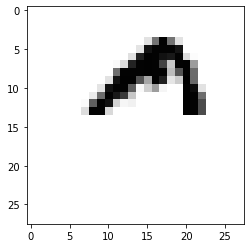

In [22]:
im_array = np.asfarray(test_inputs_list[23]).reshape((28,28))
mp.imshow(im_array, cmap='Greys', interpolation='None')

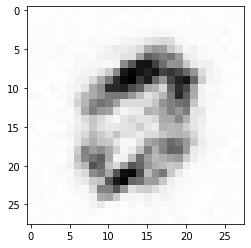

In [24]:
output = ae.feedforward(test_inputs_list[23])
im_array = np.asfarray(output).reshape((28,28))
mp.imshow(im_array, cmap='Greys', interpolation='None')

# 2/3날림

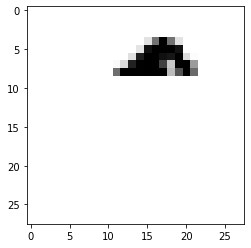

In [25]:
im_array = np.asfarray(test_inputs_list[24]).reshape((28,28))
mp.imshow(im_array, cmap='Greys', interpolation='None')

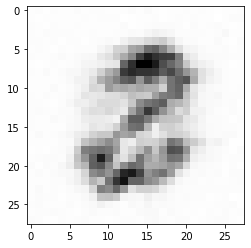

In [26]:
output = ae.feedforward(test_inputs_list[24])
im_array = np.asfarray(output).reshape((28,28))
mp.imshow(im_array, cmap='Greys', interpolation='None')